# ⚡**Problem Statement** ⚡

Ad Ease is an ads and marketing based company helping businesses elicit maximum clicks @ minimum cost

Problem at hand : Trying to understand the per page view report for different wikipedia pages for 550 days, and forecasting the number of views so that we can predict and optimize the ad placement for Ad Ease clients

Clients belong to different regions and need data on how their ads will perform on pages in different languages.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/Scaler_CaseStudies_Datasets/

/content/drive/MyDrive/Scaler_CaseStudies_Datasets


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train_1.csv', sep='delimiter', engine = 'python')

In [ ]:
df.sample(10)

"Page","2015-07-01","2015-07-02","2015-07-03","2015-07-04","2015-07-05","2015-07-06","2015-07-07","2015-07-08","2015-07-09","2015-07-10","2015-07-11","2015-07-12","2015-07-13","2015-07-14","2015-07-15","2015-07-16","2015-07-17","2015-07-18","2015-07-19","2015-07-20","2015-07-21","2015-07-22","2015-07-23","2015-07-24","2015-07-25","2015-07-26","2015-07-27","2015-07-28","2015-07-29","2015-07-30","2015-07-31","2015-08-01","2015-08-02","2015-08-03","2015-08-04","2015-08-05","2015-08-06","2015-08-07","2015-08-08","2015-08-09","2015-08-10","2015-08-11","2015-08-12","2015-08-13","2015-08-14","2015-08-15","2015-08-16","2015-08-17","2015-08-18","2015-08-19","2015-08-20","2015-08-21","2015-08-22","2015-08-23","2015-08-24","2015-08-25","2015-08-26","2015-08-27","2015-08-28","2015-08-29","2015-08-30","2015-08-31","2015-09-01","2015-09-02","2015-09-03","2015-09-04","2015-09-05","2015-09-06","2015-09-07","2015-09-08","2015-09-09","2015-09-10","2015-09-11","2015-09-12","2015-09-13","2015-09-14","2015-09-15","2015-09-16","2015-09-17","2015-09-18","2015-09-19","2015-09-20","2015-09-21","2015-09-22","2015-09-23","2015-09-24","2015-09-25","2015-09-26","2015-09-27","2015-09-28","2015-09-29","2015-09-30","2015-10-01","2015-10-02","2015-10-03","2015-10-04","2015-10-05","2015-10-06","2015-10-07","2015-10-08","2015-10-09","2015-10-10","2015-10-11","2015-10-12","2015-10-13","2015-10-14","2015-10-15","2015-10-16","2015-10-17","2015-10-18","2015-10-19","2015-10-20","2015-10-21","2015-10-22","2015-10-23","2015-10-24","2015-10-25","2015-10-26","2015-10-27","2015-10-28","2015-10-29","2015-10-30","2015-10-31","2015-11-01","2015-11-02","2015-11-03","2015-11-04","2015-11-05","2015-11-06","2015-11-07","2015-11-08","2015-11-09","2015-11-10","2015-11-11","2015-11-12","2015-11-13","2015-11-14","2015-11-15","2015-11-16","2015-11-17","2015-11-18","2015-11-19","2015-11-20","2015-11-21","2015-11-22","2015-11-23","2015-11-24","2015-11-25","2015-11-26","2015-11-27","2015-11-28","2015-11-29","2015-11-30","2015-12-01","2015-12-02","2015-12-03","2015-12-04","2015-12-05","2015-12-06","2015-12-07","2015-12-08","2015-12-09","2015-12-10","2015-12-11","2015-12-12","2015-12-13","2015-12-14","2015-12-15","2015-12-16","2015-12-17","2015-12-18","2015-12-19","2015-12-20","2015-12-21","2015-12-22","2015-12-23","2015-12-24","2015-12-25","2015-12-26","2015-12-27","2015-12-28","2015-12-29","2015-12-30","2015-12-31","2016-01-01","2016-01-02","2016-01-03","2016-01-04","2016-01-05","2016-01-06","2016-01-07","2016-01-08","2016-01-09","2016-01-10","2016-01-11","2016-01-12","2016-01-13","2016-01-14","2016-01-15","2016-01-16","2016-01-17","2016-01-18","2016-01-19","2016-01-20","2016-01-21","2016-01-22","2016-01-23","2016-01-24","2016-01-25","2016-01-26","2016-01-27","2016-01-28","2016-01-29","2016-01-30","2016-01-31","2016-02-01","2016-02-02","2016-02-03","2016-02-04","2016-02-05","2016-02-06","2016-02-07","2016-02-08","2016-02-09","2016-02-10","2016-02-11","2016-02-12","2016-02-13","2016-02-14","2016-02-15","2016-02-16","2016-02-17","2016-02-18","2016-02-19","2016-02-20","2016-02-21","2016-02-22","2016-02-23","2016-02-24","2016-02-25","2016-02-26","2016-02-27","2016-02-28","2016-02-29","2016-03-01","2016-03-02","2016-03-03","2016-03-04","2016-03-05","2016-03-06","2016-03-07","2016-03-08","2016-03-09","2016-03-10","2016-03-11","2016-03-12","2016-03-13","2016-03-14","2016-03-15","2016-03-16","2016-03-17","2016-03-18","2016-03-19","2016-03-20","2016-03-21","2016-03-22","2016-03-23","2016-03-24","2016-03-25","2016-03-26","2016-03-27","2016-03-28","2016-03-29","2016-03-30","2016-03-31","2016-04-01","2016-04-02","2016-04-03","2016-04-04","2016-04-05","2016-04-06","2016-04-07","2016-04-08","2016-04-09","2016-04-10","2016-04-11","2016-04-12","2016-04-13","2016-04-14","2016-04-15","2016-04-16","2016-04-17","2016-04-18","2016-04-19","2016-04-20","2016-04-21","2016-04-22","2016-04-23","2016-04-24","2016-04-25","2016-04-26","2016-04-27","2016-04-28","2016-04-29","2016-04-30","2016-05-01","2016-05-02","2

In [ ]:
df.shape

(145063, 1)

In [ ]:
df = df.iloc[:,0].str.rsplit(',', n=550, expand=True)
df

,0,1,2,3,4,5,6,7,8,9,...,541,542,543,544,545,546,547,548,549,550
0,"""2NE1_zh.wikipedia.org_all-access_spider""",18,11,5,13,14,9,9,22,26,...,32,63,15,26,14,20,22,19,18,20
1,"""2PM_zh.wikipedia.org_all-access_spider""",11,14,15,18,11,13,22,11,10,...,17,42,28,15,9,30,52,45,26,20
2,"""3C_zh.wikipedia.org_all-access_spider""",1,0,1,1,0,4,0,3,4,...,3,1,1,7,4,4,6,3,4,17
3,"""4minute_zh.wikipedia.org_all-access_spider""",35,13,10,94,4,26,14,9,11,...,32,10,26,27,16,11,17,19,10,11
4,"""52_Hz_I_Love_You_zh.wikipedia.org_all-access_...",,,,,,,,,,...,48,9,25,13,3,11,27,13,36,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,"""Underworld_(serie_de_películas)_es.wikipedia....",,,,,,,,,,...,,,,,13,12,13,3,5,10
145059,"""Resident_Evil:_Capítulo_Final_es.wikipedia.or...",,,,,,,,,,...,,,,,,,,,,
145060,"""Enamorándome_de_Ramón_es.wikipedia.org_all-ac...",,,,,,,,,,...,,,,,,,,,,
145061,"""Hasta_el_último_hombre_es.wikipedia.org_all-a...",,,,,,,,,,...,,,,,,,,,,


In [ ]:
columns = ['Page','2015-07-01','2015-07-02','2015-07-03','2015-07-04','2015-07-05','2015-07-06','2015-07-07','2015-07-08','2015-07-09','2015-07-10','2015-07-11','2015-07-12','2015-07-13','2015-07-14','2015-07-15','2015-07-16','2015-07-17','2015-07-18','2015-07-19','2015-07-20','2015-07-21','2015-07-22','2015-07-23','2015-07-24','2015-07-25','2015-07-26','2015-07-27','2015-07-28','2015-07-29','2015-07-30','2015-07-31','2015-08-01','2015-08-02','2015-08-03','2015-08-04','2015-08-05','2015-08-06','2015-08-07','2015-08-08','2015-08-09','2015-08-10','2015-08-11','2015-08-12','2015-08-13','2015-08-14','2015-08-15','2015-08-16','2015-08-17','2015-08-18','2015-08-19','2015-08-20','2015-08-21','2015-08-22','2015-08-23','2015-08-24','2015-08-25','2015-08-26','2015-08-27','2015-08-28','2015-08-29','2015-08-30','2015-08-31','2015-09-01','2015-09-02','2015-09-03','2015-09-04','2015-09-05','2015-09-06','2015-09-07','2015-09-08','2015-09-09','2015-09-10','2015-09-11','2015-09-12','2015-09-13','2015-09-14','2015-09-15','2015-09-16','2015-09-17','2015-09-18','2015-09-19','2015-09-20','2015-09-21','2015-09-22','2015-09-23','2015-09-24','2015-09-25','2015-09-26','2015-09-27','2015-09-28','2015-09-29','2015-09-30','2015-10-01','2015-10-02','2015-10-03','2015-10-04','2015-10-05','2015-10-06','2015-10-07','2015-10-08','2015-10-09','2015-10-10','2015-10-11','2015-10-12','2015-10-13','2015-10-14','2015-10-15','2015-10-16','2015-10-17','2015-10-18','2015-10-19','2015-10-20','2015-10-21','2015-10-22','2015-10-23','2015-10-24','2015-10-25','2015-10-26','2015-10-27','2015-10-28','2015-10-29','2015-10-30','2015-10-31','2015-11-01','2015-11-02','2015-11-03','2015-11-04','2015-11-05','2015-11-06','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12','2015-11-13','2015-11-14','2015-11-15','2015-11-16','2015-11-17','2015-11-18','2015-11-19','2015-11-20','2015-11-21','2015-11-22','2015-11-23','2015-11-24','2015-11-25','2015-11-26','2015-11-27','2015-11-28','2015-11-29','2015-11-30','2015-12-01','2015-12-02','2015-12-03','2015-12-04','2015-12-05','2015-12-06','2015-12-07','2015-12-08','2015-12-09','2015-12-10','2015-12-11','2015-12-12','2015-12-13','2015-12-14','2015-12-15','2015-12-16','2015-12-17','2015-12-18','2015-12-19','2015-12-20','2015-12-21','2015-12-22','2015-12-23','2015-12-24','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31','2016-01-01','2016-01-02','2016-01-03','2016-01-04','2016-01-05','2016-01-06','2016-01-07','2016-01-08','2016-01-09','2016-01-10','2016-01-11','2016-01-12','2016-01-13','2016-01-14','2016-01-15','2016-01-16','2016-01-17','2016-01-18','2016-01-19','2016-01-20','2016-01-21','2016-01-22','2016-01-23','2016-01-24','2016-01-25','2016-01-26','2016-01-27','2016-01-28','2016-01-29','2016-01-30','2016-01-31','2016-02-01','2016-02-02','2016-02-03','2016-02-04','2016-02-05','2016-02-06','2016-02-07','2016-02-08','2016-02-09','2016-02-10','2016-02-11','2016-02-12','2016-02-13','2016-02-14','2016-02-15','2016-02-16','2016-02-17','2016-02-18','2016-02-19','2016-02-20','2016-02-21','2016-02-22','2016-02-23','2016-02-24','2016-02-25','2016-02-26','2016-02-27','2016-02-28','2016-02-29','2016-03-01','2016-03-02','2016-03-03','2016-03-04','2016-03-05','2016-03-06','2016-03-07','2016-03-08','2016-03-09','2016-03-10','2016-03-11','2016-03-12','2016-03-13','2016-03-14','2016-03-15','2016-03-16','2016-03-17','2016-03-18','2016-03-19','2016-03-20','2016-03-21','2016-03-22','2016-03-23','2016-03-24','2016-03-25','2016-03-26','2016-03-27','2016-03-28','2016-03-29','2016-03-30','2016-03-31','2016-04-01','2016-04-02','2016-04-03','2016-04-04','2016-04-05','2016-04-06','2016-04-07','2016-04-08','2016-04-09','2016-04-10','2016-04-11','2016-04-12','2016-04-13','2016-04-14','2016-04-15','2016-04-16','2016-04-17','2016-04-18','2016-04-19','2016-04-20','2016-04-21','2016-04-22','2016-04-23','2016-04-24','2016-04-25','2016-04-26','2016-04-27','2016-04-28','2016-04-29','2016-04-30','2016-05-01','2016-05-02','2016-05-03','2016-05-04','2016-05-05','2016-05-06','2016-05-07','2016-05-08','2016-05-09','2016-05-10','2016-05-11','2016-05-12','2016-05-13','2016-05-14','2016-05-15','2016-05-16','2016-05-17','2016-05-18','2016-05-19','2016-05-20','2016-05-21','2016-05-22','2016-05-23','2016-05-24','2016-05-25','2016-05-26','2016-05-27','2016-05-28','2016-05-29','2016-05-30','2016-05-31','2016-06-01','2016-06-02','2016-06-03','2016-06-04','2016-06-05','2016-06-06','2016-06-07','2016-06-08','2016-06-09','2016-06-10','2016-06-11','2016-06-12','2016-06-13','2016-06-14','2016-06-15','2016-06-16','2016-06-17','2016-06-18','2016-06-19','2016-06-20','2016-06-21','2016-06-22','2016-06-23','2016-06-24','2016-06-25','2016-06-26','2016-06-27','2016-06-28','2016-06-29','2016-06-30','2016-07-01','2016-07-02','2016-07-03','2016-07-04','2016-07-05','2016-07-06','2016-07-07','2016-07-08','2016-07-09','2016-07-10','2016-07-11','2016-07-12','2016-07-13','2016-07-14','2016-07-15','2016-07-16','2016-07-17','2016-07-18','2016-07-19','2016-07-20','2016-07-21','2016-07-22','2016-07-23','2016-07-24','2016-07-25','2016-07-26','2016-07-27','2016-07-28','2016-07-29','2016-07-30','2016-07-31','2016-08-01','2016-08-02','2016-08-03','2016-08-04','2016-08-05','2016-08-06','2016-08-07','2016-08-08','2016-08-09','2016-08-10','2016-08-11','2016-08-12','2016-08-13','2016-08-14','2016-08-15','2016-08-16','2016-08-17','2016-08-18','2016-08-19','2016-08-20','2016-08-21','2016-08-22','2016-08-23','2016-08-24','2016-08-25','2016-08-26','2016-08-27','2016-08-28','2016-08-29','2016-08-30','2016-08-31','2016-09-01','2016-09-02','2016-09-03','2016-09-04','2016-09-05','2016-09-06','2016-09-07','2016-09-08','2016-09-09','2016-09-10','2016-09-11','2016-09-12','2016-09-13','2016-09-14','2016-09-15','2016-09-16','2016-09-17','2016-09-18','2016-09-19','2016-09-20','2016-09-21','2016-09-22','2016-09-23','2016-09-24','2016-09-25','2016-09-26','2016-09-27','2016-09-28','2016-09-29','2016-09-30','2016-10-01','2016-10-02','2016-10-03','2016-10-04','2016-10-05','2016-10-06','2016-10-07','2016-10-08','2016-10-09','2016-10-10','2016-10-11','2016-10-12','2016-10-13','2016-10-14','2016-10-15','2016-10-16','2016-10-17','2016-10-18','2016-10-19','2016-10-20','2016-10-21','2016-10-22','2016-10-23','2016-10-24','2016-10-25','2016-10-26','2016-10-27','2016-10-28','2016-10-29','2016-10-30','2016-10-31','2016-11-01','2016-11-02','2016-11-03','2016-11-04','2016-11-05','2016-11-06','2016-11-07','2016-11-08','2016-11-09','2016-11-10','2016-11-11','2016-11-12','2016-11-13','2016-11-14','2016-11-15','2016-11-16','2016-11-17','2016-11-18','2016-11-19','2016-11-20','2016-11-21','2016-11-22','2016-11-23','2016-11-24','2016-11-25','2016-11-26','2016-11-27','2016-11-28','2016-11-29','2016-11-30','2016-12-01','2016-12-02','2016-12-03','2016-12-04','2016-12-05','2016-12-06','2016-12-07','2016-12-08','2016-12-09','2016-12-10','2016-12-11','2016-12-12','2016-12-13','2016-12-14','2016-12-15','2016-12-16','2016-12-17','2016-12-18','2016-12-19','2016-12-20','2016-12-21','2016-12-22','2016-12-23','2016-12-24','2016-12-25','2016-12-26','2016-12-27','2016-12-28','2016-12-29','2016-12-30','2016-12-31']

In [ ]:
#Renaming columns
df.columns = columns

In [ ]:
pd.set_option('display.max_colwidth', None)
df.sample(10)

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
8505,"""Alphabet_Inc._en.wikipedia.org_desktop_all-agents""",,,,,,,,,,...,2832,2165,1522,1330,1997,2565,2673,2747,2260,1578
122714,"""黒木渚_ja.wikipedia.org_all-access_all-agents""",307,293,298,318,330,269,172,190,186,...,95,124,111,146,151,136,143,123,926,186
5508,"""Mike_Marshall_fr.wikipedia.org_desktop_all-agents""",55,59,61,39,65,73,47,50,68,...,3778,7065,3038,1055,1489,1001,998,730,547,466
139137,"""Wirtschaftszahlen_zum_Automobil_de.wikipedia.org_all-access_all-agents""",177,180,164,91,109,196,187,240,232,...,1080,1260,933,1134,750,1190,1367,1165,1324,1206
137937,"""John_Boyega_de.wikipedia.org_all-access_all-agents""",86,98,82,91,112,79,111,190,114,...,247,240,245,326,411,753,807,522,398,259
19182,"""Боб_Дилан_ru.wikipedia.org_mobile-web_all-agents""",192,275,743,378,317,254,219,228,242,...,293,327,310,277,399,313,255,286,297,327
112895,"""Roman_Catholic_Diocese_of_Kayes_en.wikipedia.org_all-access_all-agents""",3,1,,13,2,4,,2,1,...,1,,4,2,4,1,,1,2,3
89029,"""松岡茉優_ja.wikipedia.org_desktop_all-agents""",4138,1796,1361,2447,1243,899,841,993,978,...,773,908,786,805,686,662,4369,950,1173,867
87771,"""ガンダムシリーズ一覧_ja.wikipedia.org_desktop_all-agents""",832,826,954,900,793,716,844,799,824,...,738,655,795,878,754,733,668,623,1031,612
15122,"""File:ParacasSkullsIcaMuseum.jpg_commons.wikimedia.org_all-access_spider""",1,1,,0,1,,,,0,...,6,0,5,3,1,1,1,0,0,1


In [ ]:
# Extract language from webpage
df['language'] = df['Page'].str.split(r'([a-z]{2})\.wikipedia\.org', expand = True)[1]

In [ ]:
# Dropping 12% rows which aren't wikipedia pages

print("The dataframe is:")
print(df.shape)
df=df.dropna(subset=["language"])
print("After dropping None values:")
print(df.shape)

The dataframe is:
(145063, 552)
After dropping None values:
(127208, 552)


In [ ]:
# Dropping the Page column which is not required in the analysis
df.drop('Page', axis = 1, inplace = True)
df

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,language
0,18,11,5,13,14,9,9,22,26,24,...,63,15,26,14,20,22,19,18,20,zh
1,11,14,15,18,11,13,22,11,10,4,...,42,28,15,9,30,52,45,26,20,zh
2,1,0,1,1,0,4,0,3,4,4,...,1,1,7,4,4,6,3,4,17,zh
3,35,13,10,94,4,26,14,9,11,16,...,10,26,27,16,11,17,19,10,11,zh
4,,,,,,,,,,,...,9,25,13,3,11,27,13,36,10,zh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,,,,,,,,,,,...,,,,13,12,13,3,5,10,es
145059,,,,,,,,,,,...,,,,,,,,,,es
145060,,,,,,,,,,,...,,,,,,,,,,es
145061,,,,,,,,,,,...,,,,,,,,,,es


In [ ]:
#Replacing '' string values with zero
for i in df.columns:
  if i not in ('language'):
    df[i].replace('',0,inplace=True)

In [ ]:
df['2016-11-10'] = df['2016-11-10'].astype('float').astype('int')

In [ ]:
# Define a function to convert columns to int data type
def convert_to_int(col):
    if col.name != df.columns[-1]:
        return col.astype(int)
    else:
        return col

# Use apply() and lambda to apply the function to each column
df = df.apply(lambda x: convert_to_int(x))

In [ ]:
# Summing up total page views for a language on a single day
df_final = df.groupby(['language']).sum()
df_final

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
language,,,,,,,,,,,,,,,,,,,,,
de,13260519,13079896,12554042,11520379,13392347,14741758,14296292,14505194,13964778,13014478,...,15370604,15561414,15037095,23760349,22376548,20125264,19152389,18447906,17606030,16562720
en,84712190,84438545,80167728,83463204,86198637,92809436,87838054,82880196,84798911,84319456,...,120491573,112905341,119860920,123926291,139112120,145628731,141278366,150557534,125404585,123623809
es,15278553,14601013,13427632,12606538,13710356,15625554,15230654,14781870,14502906,13184481,...,13837820,13155676,12385052,12713363,16819231,15945353,16577375,15647135,11560095,11077924
fr,8458638,8512952,8186030,8749842,8590493,8949799,8650800,8491533,8403646,7930703,...,11606988,11383657,11005480,11867509,16678423,15281470,13781521,13399796,12471074,11504691
ja,11863200,13620792,12305383,15456239,14827204,12920547,12568828,12492787,12178258,12652904,...,13793066,19777366,17501297,16720214,15918093,16123301,16150715,17682688,19450687,24460799
ru,9463854,9627643,8923463,8393214,8938528,9628896,9408180,9364117,9592309,10984872,...,13465000,13292086,13133353,16839517,16717095,15040168,14000319,13478977,12066750,13223033
zh,4144988,4151189,4123659,4163448,4441286,4464290,4459421,4575842,4547843,4727889,...,5946850,5865102,6215165,6569812,6485813,6478442,6513400,6042545,6111203,6298565


In [ ]:
df = df_final.T/1000000
df

language,de,en,es,fr,ja,ru,zh
2015-07-01,13.260519,84.712190,15.278553,8.458638,11.863200,9.463854,4.144988
2015-07-02,13.079896,84.438545,14.601013,8.512952,13.620792,9.627643,4.151189
2015-07-03,12.554042,80.167728,13.427632,8.186030,12.305383,8.923463,4.123659
2015-07-04,11.520379,83.463204,12.606538,8.749842,15.456239,8.393214,4.163448
2015-07-05,13.392347,86.198637,13.710356,8.590493,14.827204,8.938528,4.441286
...,...,...,...,...,...,...,...
2016-12-27,20.125264,145.628731,15.945353,15.281470,16.123301,15.040168,6.478442
2016-12-28,19.152389,141.278366,16.577375,13.781521,16.150715,14.000319,6.513400
2016-12-29,18.447906,150.557534,15.647135,13.399796,17.682688,13.478977,6.042545
2016-12-30,17.606030,125.404585,11.560095,12.471074,19.450687,12.066750,6.111203


In [ ]:
df.index = pd.to_datetime(df.index)

**With this we have the dataset ready to be fed to the model!!!**

##EDA


---


In [ ]:
display(df['de'].describe())
display(df['en'].describe())
display(df['es'].describe())
display(df['fr'].describe())
display(df['ja'].describe())
display(df['ru'].describe())
display(df['zh'].describe())

count    550.000000
mean      16.112752
std        1.992877
min       11.445863
25%       14.760343
50%       15.878656
75%       17.351687
max       23.760349
Name: de, dtype: float64

count    550.000000
mean     106.815928
std       23.354697
min       76.561328
25%       91.716547
50%      101.439014
75%      114.137516
max      202.062970
Name: en, dtype: float64

count    550.000000
mean      17.254910
std        3.294102
min        8.960082
25%       14.753762
50%       17.100964
75%       20.197132
max       29.871935
Name: es, dtype: float64

count    550.000000
mean      11.596043
std        1.857144
min        6.915625
25%       10.712505
50%       11.525042
75%       12.464441
max       19.773082
Name: fr, dtype: float64

count    550.000000
mean      15.584164
std        2.475992
min        8.862033
25%       13.799376
50%       15.539027
75%       17.171168
max       29.422004
Name: ja, dtype: float64

count    550.000000
mean      14.542483
std        5.739684
min        7.427083
25%       12.230826
50%       13.585579
75%       14.805545
max       44.537181
Name: ru, dtype: float64

count    550.000000
mean       5.767246
std        1.006086
min        3.071108
25%        4.897222
50%        5.927901
75%        6.417991
max       10.922626
Name: zh, dtype: float64

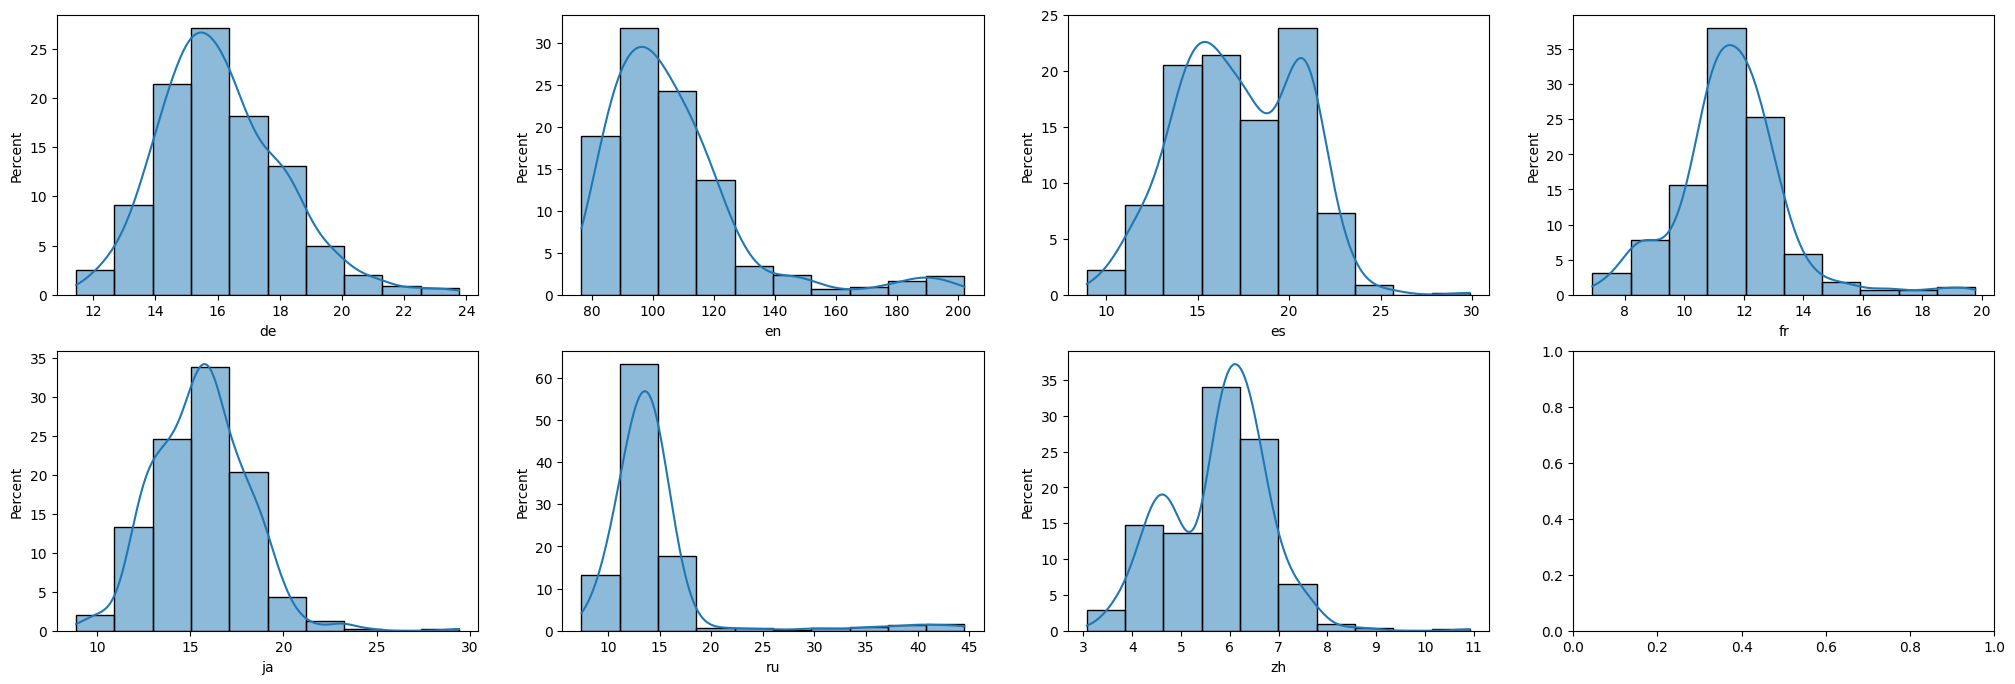

In [ ]:
fig, ax = plt.subplots(2, 4, figsize = (25,8))

sns.histplot(data=df, x = 'de', stat = 'percent', kde= True, bins = 10, ax = ax[0][0])
sns.histplot(data=df, x = 'en', stat = 'percent', kde= True, bins = 10, ax = ax[0][1])
sns.histplot(data=df, x = 'es', stat = 'percent', kde= True, bins = 10, ax = ax[0][2])
sns.histplot(data=df, x = 'fr', stat = 'percent', kde= True, bins = 10, ax = ax[0][3])
sns.histplot(data=df, x = 'ja', stat = 'percent', kde= True, bins = 10, ax = ax[1][0])
sns.histplot(data=df, x = 'ru', stat = 'percent', kde= True, bins = 10, ax = ax[1][1])
sns.histplot(data=df, x = 'zh', stat = 'percent', kde= True, bins = 10, ax = ax[1][2])

plt.show()

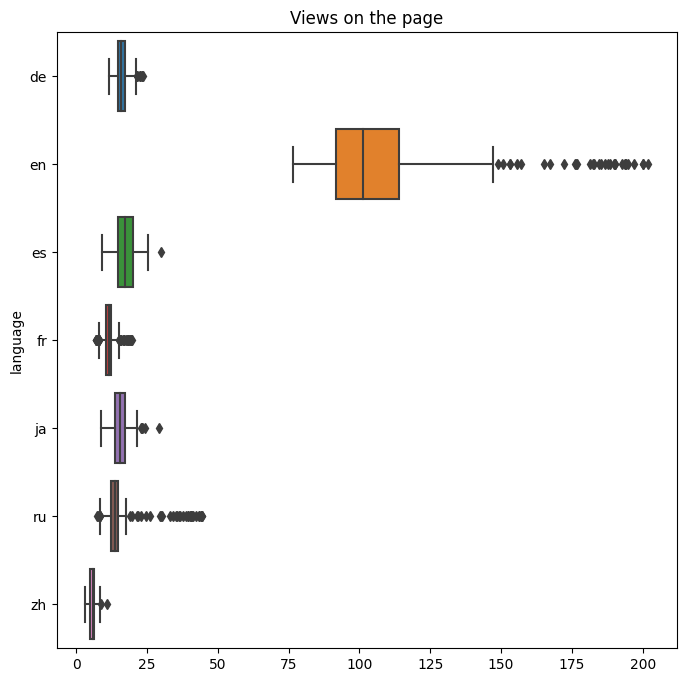

In [ ]:
plt.rcParams["figure.figsize"] = [8, 8]
plt.title('Views on the page')
sns.boxplot(data=df[['de','en','es','fr','ja','ru','zh']], orient="h")
plt.show()

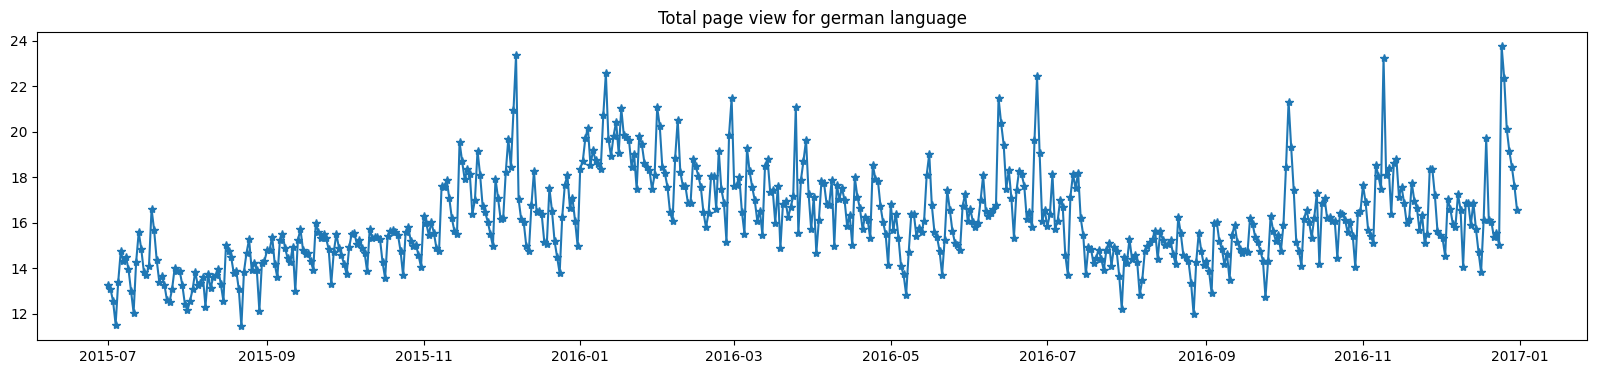

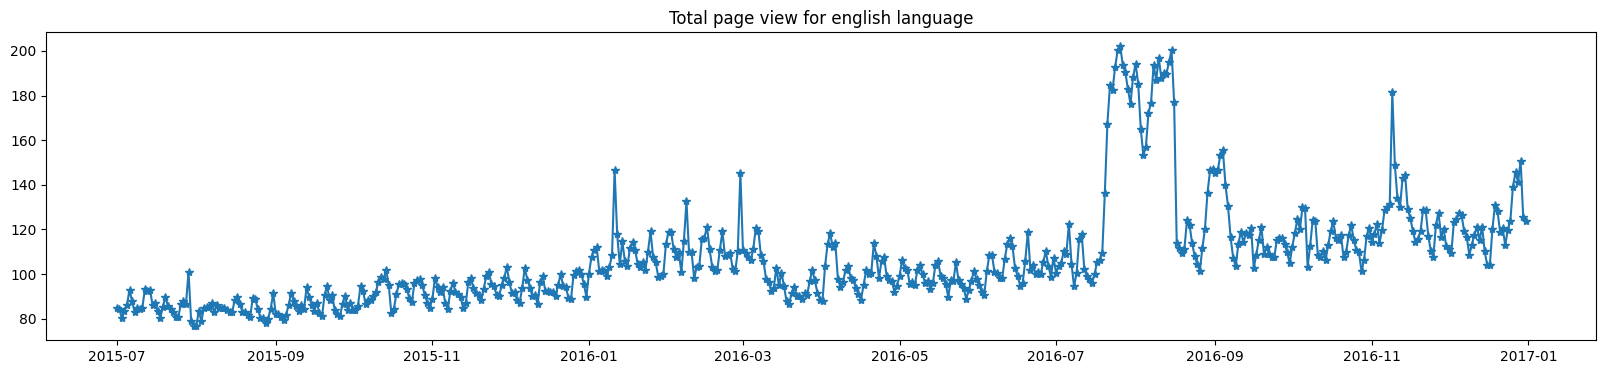

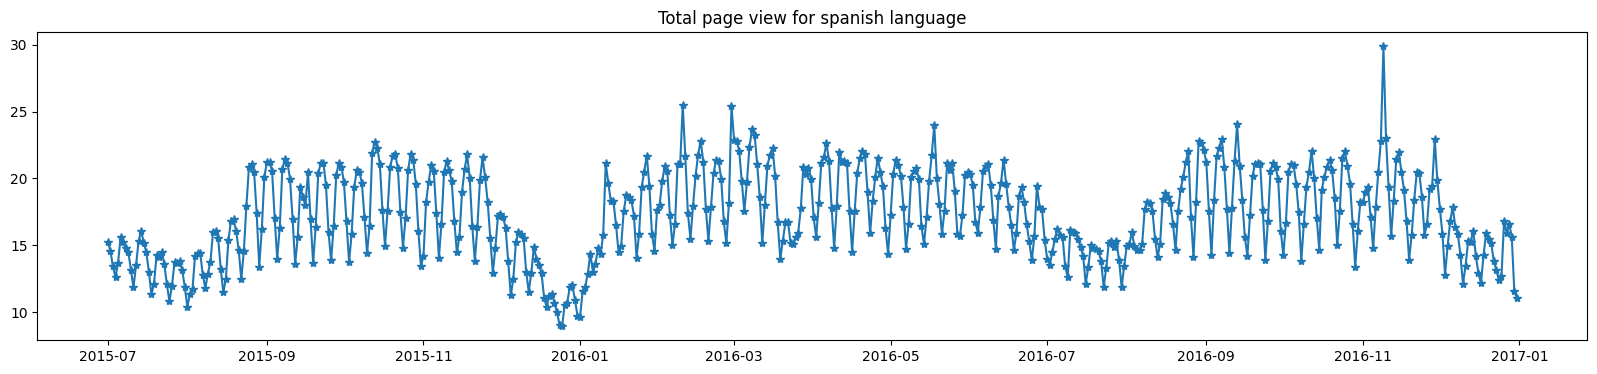

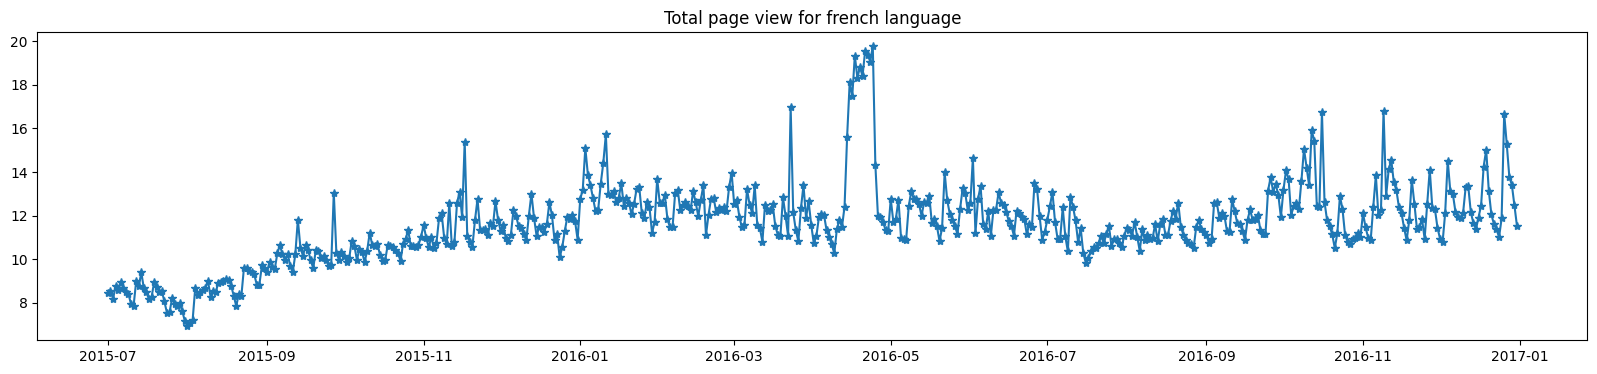

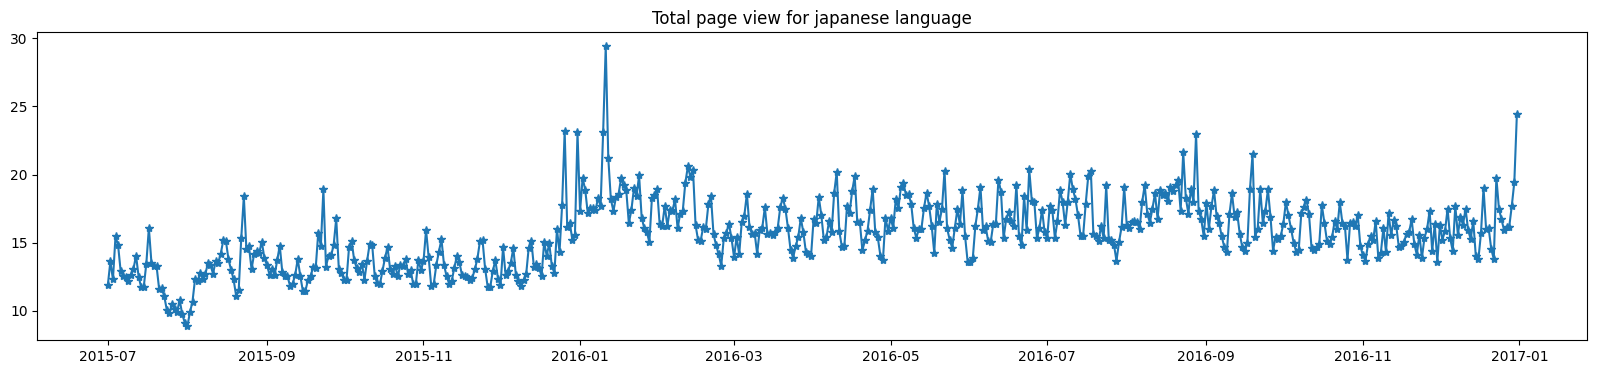

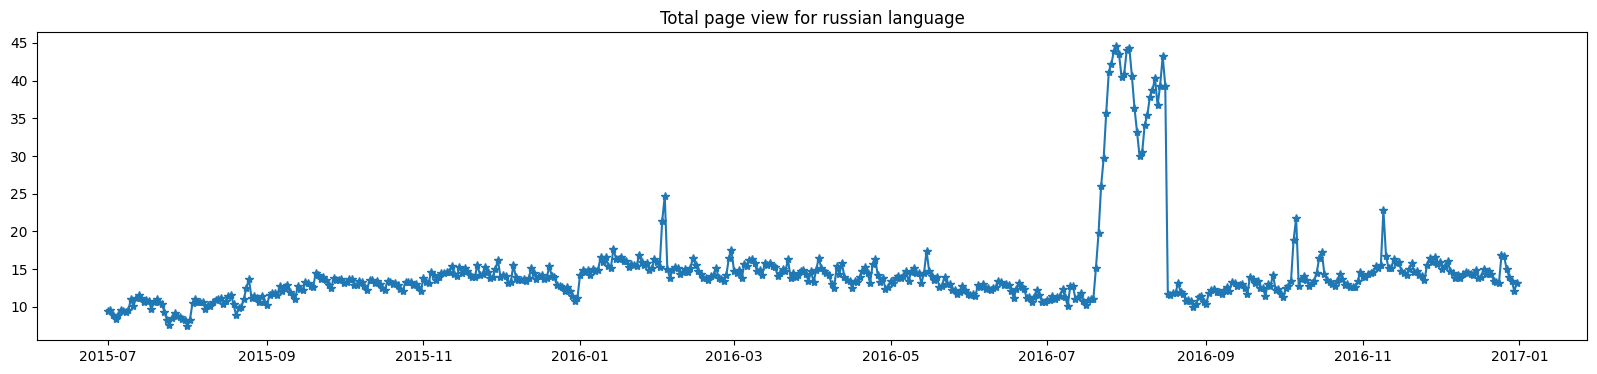

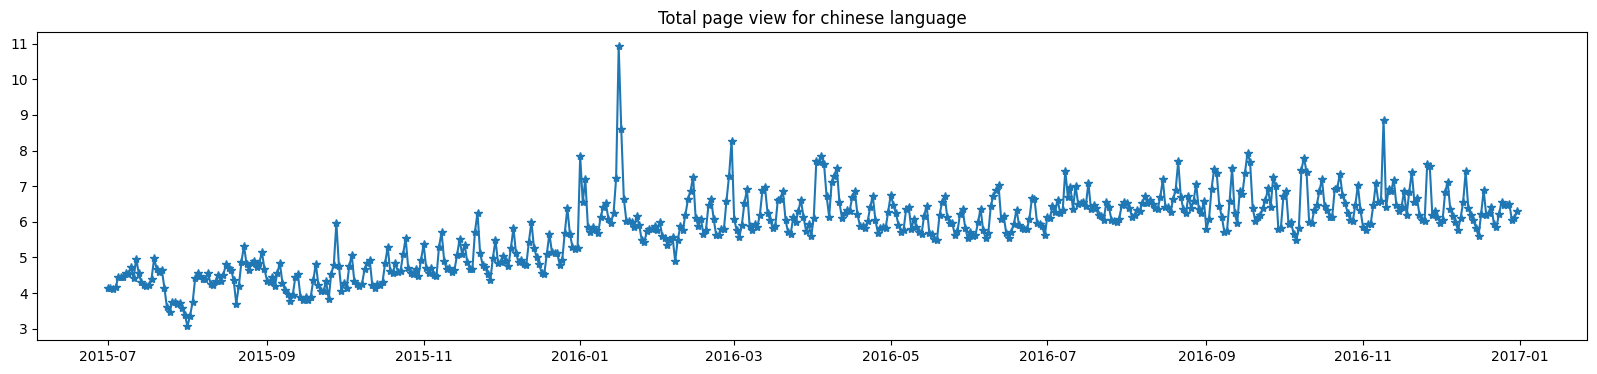

In [ ]:
plt.rcParams["figure.figsize"] = [20, 4]
plt.title('Total page view for german language')
plt.plot(df.index, df['de'], '-*')
plt.show()
plt.title('Total page view for english language')
plt.plot(df.index, df['en'], '-*')
plt.show()
plt.title('Total page view for spanish language')
plt.plot(df.index, df['es'], '-*')
plt.show()
plt.title('Total page view for french language')
plt.plot(df.index, df['fr'], '-*')
plt.show()
plt.title('Total page view for japanese language')
plt.plot(df.index, df['ja'], '-*')
plt.show()
plt.title('Total page view for russian language')
plt.plot(df.index, df['ru'], '-*')
plt.show()
plt.title('Total page view for chinese language')
plt.plot(df.index, df['zh'], '-*')
plt.show()
# display(plt.plot(df.index, df['es'], '-*'))
plt.show()

#**Forecasting for English language**

In [ ]:
df_eng = df.iloc[:,1:2]

[]

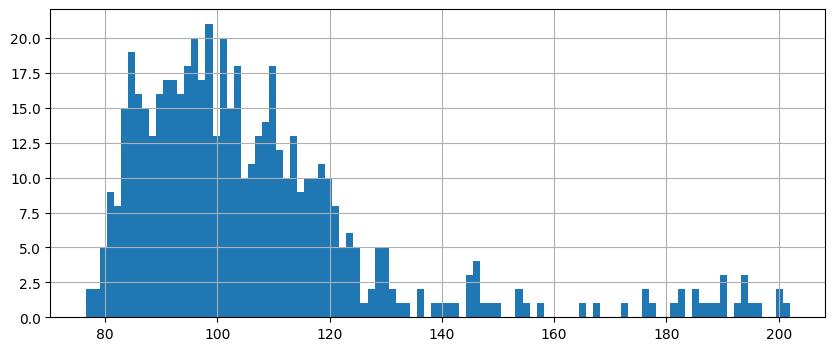

In [ ]:
plt.rcParams["figure.figsize"] = [10, 4]
df_eng.en.hist(bins=100).plot()

<Axes: >

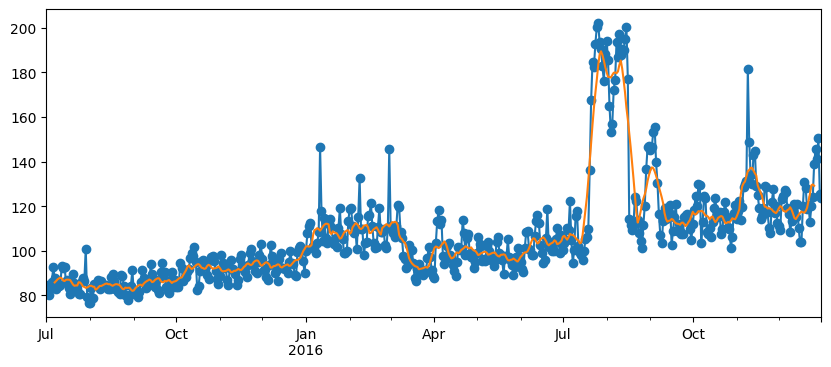

In [ ]:
df_eng.en.plot(style='-o')
df_eng.en.rolling(12, center=True).mean().plot()

#**Stationarity of data**

**Decomposition**

In [ ]:
import statsmodels.api as sm

model = sm.tsa.seasonal_decompose(df_eng.en, model='additive')

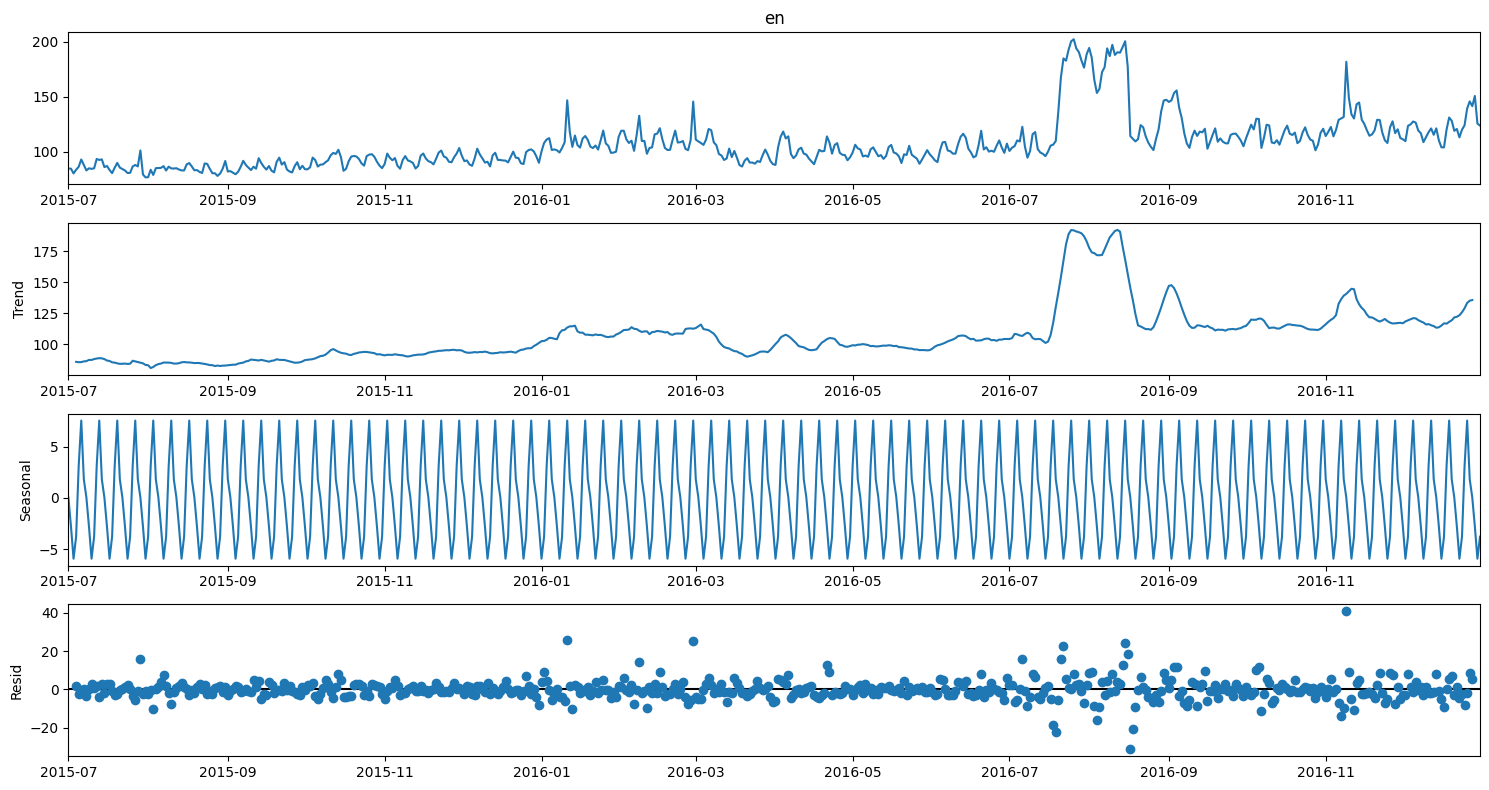

In [ ]:
plt.rcParams["figure.figsize"] = [15, 8]
model.plot();

**Dickey-Fuller test**

In [ ]:
sm.tsa.stattools.adfuller(df_eng.en)[1]

0.18953359279992998

In [ ]:
def adf_test(data, significance_level=0.05):
    pvalue = sm.tsa.stattools.adfuller(data)[1] 
    if pvalue <= significance_level:
        print('Sequence is stationary')
    else:
        print('Sequence is not stationary')

adf_test(df_eng.en)

Sequence is not stationary


<Axes: >

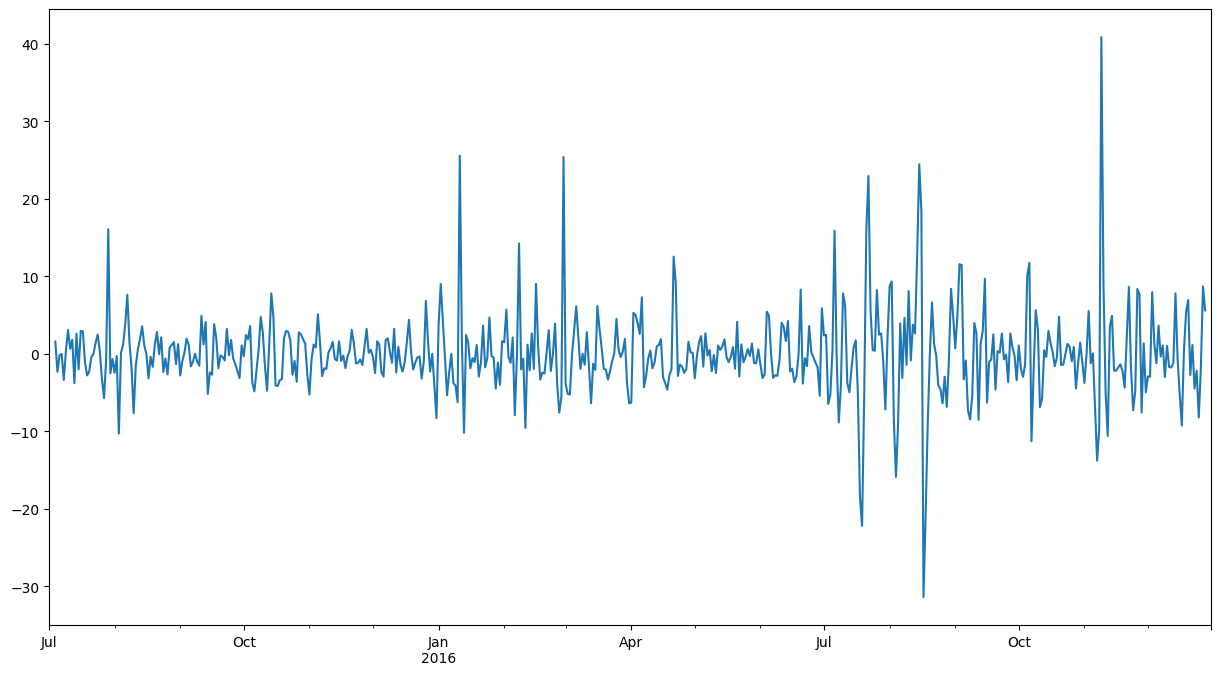

In [ ]:
model.resid.plot()

In [ ]:
adf_test(model.resid.dropna())

Sequence is stationary


**Differencing**

<Axes: >

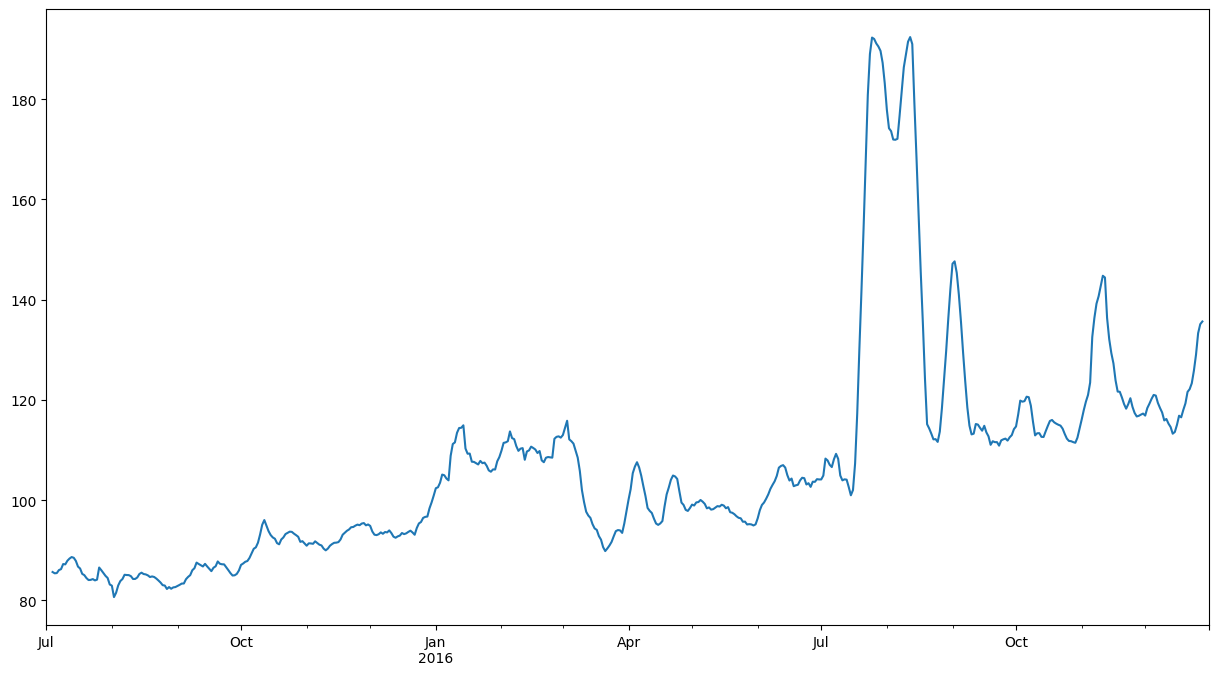

In [ ]:
model.trend.plot()

<Axes: xlabel='date'>

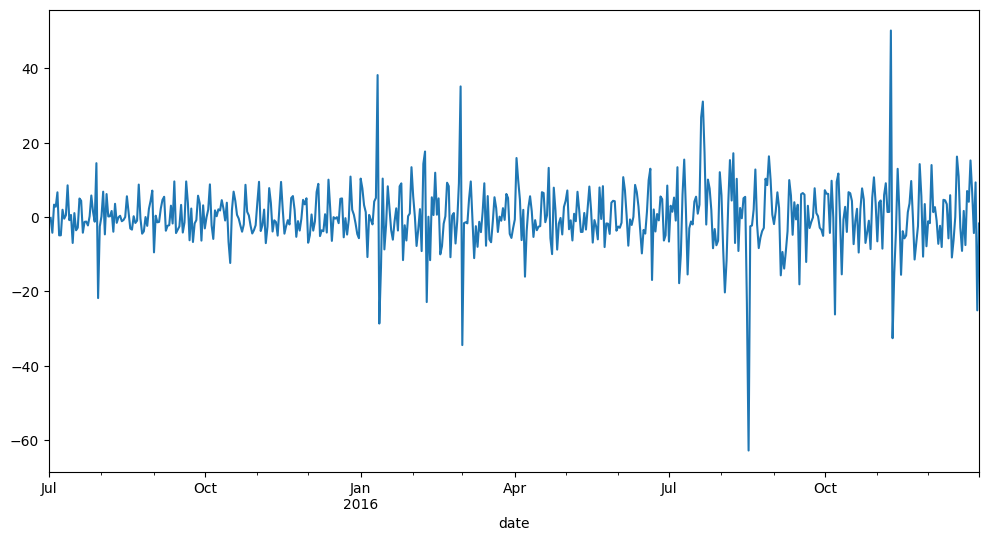

In [ ]:
df_eng.en.diff(1).plot()

In [ ]:
adf_test(df_eng.en.diff(1).dropna())

Sequence is stationary


#**ACF & PACF**

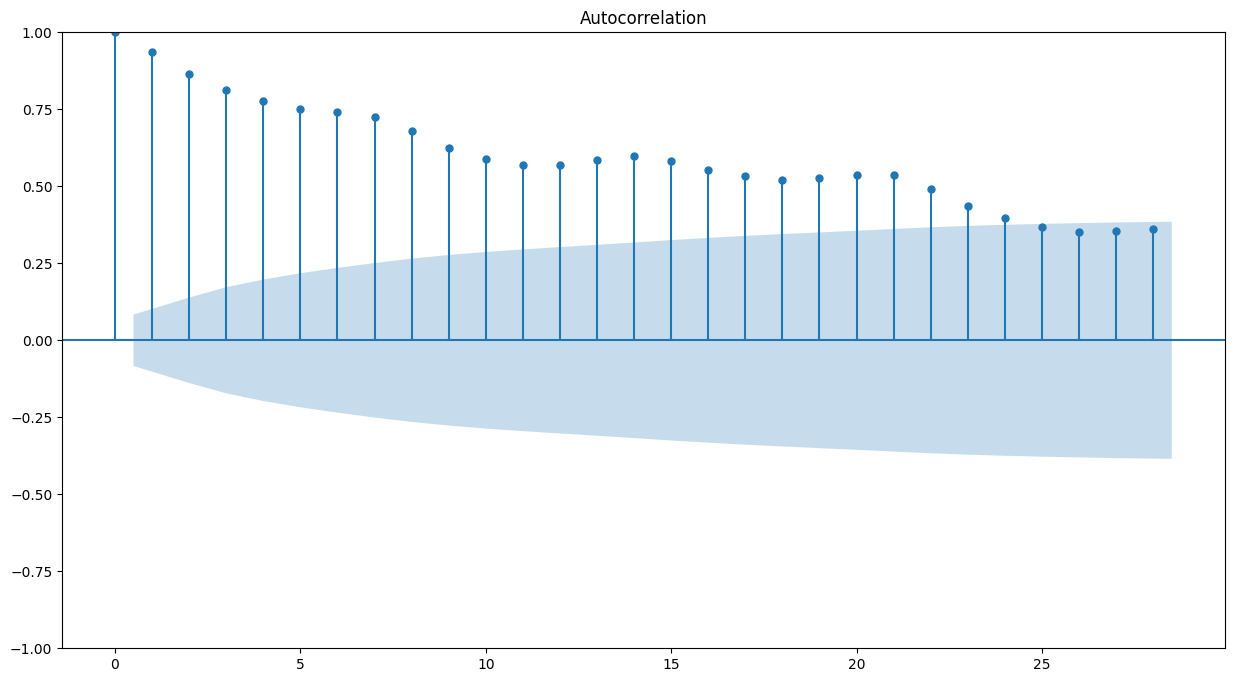

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_eng.en)
pyplot.show()

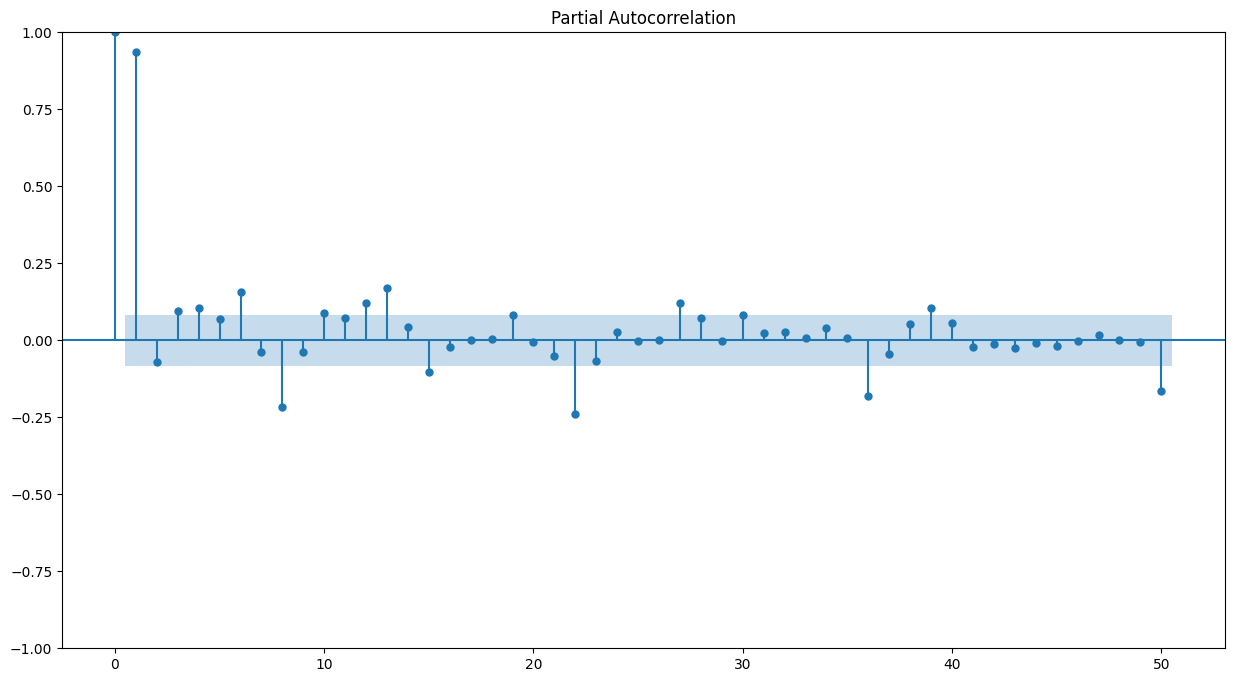

In [ ]:
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_eng.en, lags=50)
pyplot.show()

#**ARIMA Model**

In [ ]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

In [ ]:
# Split into train and test
train_x = df_eng.loc[df_eng.index < df_eng.index[-15]].copy()
test_x = df_eng.loc[df_eng.index >= df_eng.index[-15]].copy()

test_x

language,en
2016-12-17,103.803798
2016-12-18,120.028790
2016-12-19,130.939883
2016-12-20,128.043832
2016-12-21,118.888048
2016-12-22,120.491573
2016-12-23,112.905341
2016-12-24,119.860920
2016-12-25,123.926291
2016-12-26,139.112120


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE : 15.713
RMSE : 18.812
MAPE: 0.118


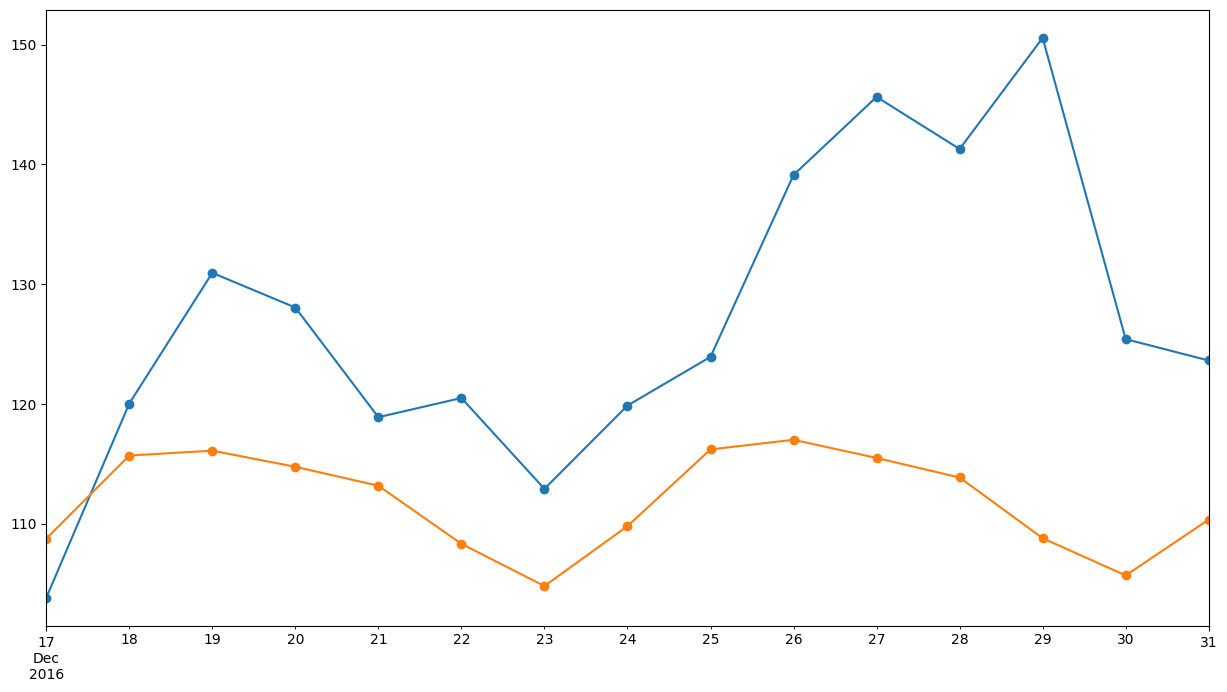

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_x.en, order=(8, 1, 6)) 
model = model.fit(disp=False)

test_x['pred'] = model.forecast(steps=15)

test_x['en'].plot(style='-o')
test_x['pred'].plot(style='-o')
performance(test_x['en'], test_x['pred'])

**Grid search to find best hyperparameter values**

Below code took a lot of time for computation hence commenting it out

The best hyperparameter (p, d, q) values as per grid for ARIMA is (1, 2, 2) with MSE of 10.811

In [ ]:
# import warnings
# from math import sqrt
# from pandas import read_csv
# from pandas import datetime
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
 
# # evaluate an ARIMA model for a given order (p,d,q)
# def evaluate_arima_model(X, arima_order):
#  # prepare training dataset
#  train_size = int(len(X) * 0.66)
#  train, test = X[0:train_size], X[train_size:]
#  history = [x for x in train]
#  # make predictions
#  predictions = list()
#  for t in range(len(test)):
#   model = ARIMA(history, order=arima_order)
#   model_fit = model.fit()
#   yhat = model_fit.forecast()[0]
#   predictions.append(yhat)
#   history.append(test[t])
#  # calculate out of sample error
#  rmse = sqrt(mean_squared_error(test, predictions))
#  return rmse
 
# # evaluate combinations of p, d and q values for an ARIMA model
# def evaluate_models(dataset, p_values, d_values, q_values):
#  dataset = dataset.astype('float32')
#  best_score, best_cfg = float("inf"), None
#  for p in p_values:
#   for d in d_values:
#     for q in q_values:
#       order = (p,d,q)
#       try:
#         rmse = evaluate_arima_model(dataset, order)
#         if rmse < best_score:
#           best_score, best_cfg = rmse, order
#         print('ARIMA%s RMSE=%.3f' % (order,rmse))
#       except:
#         continue
#   print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# # load dataset
# def parser(x):
#  return datetime.strptime('190'+x, '%Y-%m')
# series = df_eng
# # evaluate parameters
# p_values = range(0, 3)
# d_values = range(0, 3)
# q_values = range(0, 3)
# warnings.filterwarnings("ignore")
# evaluate_models(series.values, p_values, d_values, q_values)

#**SARIMAX with exog**

In [ ]:
exog = pd.read_csv('Exog_Campaign_eng', sep='delimiter', engine = 'python')

In [ ]:
exog.shape

(550, 1)

In [ ]:
exog.loc[exog['Exog'] == 1].value_counts()

Exog
1       54
dtype: int64

In [ ]:
df_eng_exog = df_eng.copy()
df_eng_exog['exog'] = exog.values
df_eng_exog

language,en,exog
2015-07-01,84.712190,0
2015-07-02,84.438545,0
2015-07-03,80.167728,0
2015-07-04,83.463204,0
2015-07-05,86.198637,0
...,...,...
2016-12-27,145.628731,1
2016-12-28,141.278366,1
2016-12-29,150.557534,1
2016-12-30,125.404585,0


In [ ]:
df_eng_exog['exog'].value_counts()

0    496
1     54
Name: exog, dtype: int64

In [ ]:
# Split into train and test
train_x = df_eng_exog.loc[df_eng_exog.index < df_eng_exog.index[-15]].copy()
test_x = df_eng_exog.loc[df_eng_exog.index >= df_eng_exog.index[-15]].copy()

test_x

language,en,exog
2016-12-17,103.803798,0
2016-12-18,120.028790,0
2016-12-19,130.939883,0
2016-12-20,128.043832,0
2016-12-21,118.888048,0
2016-12-22,120.491573,0
2016-12-23,112.905341,0
2016-12-24,119.860920,0
2016-12-25,123.926291,0
2016-12-26,139.112120,0


In [ ]:
model = SARIMAX(train_x['en'], exog=train_x['exog'], order=(1,0,0),seasonal_order=(1,0,1,7))
results = model.fit(disp=False)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
start=len(train_x)
end=len(train_x)+len(test_x)-1

In [ ]:
exog_forecast = test_x[['exog']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')

MAE : 12.059
RMSE : 13.163
MAPE: 0.094


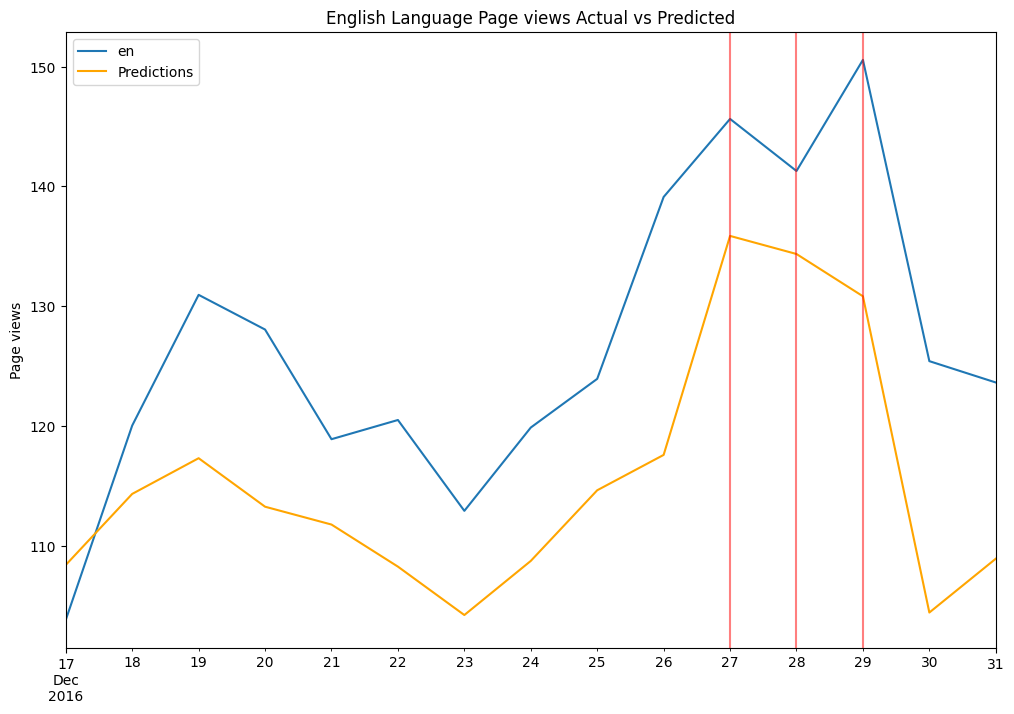

In [ ]:
performance(test_x['en'], predictions)
# Plot predictions against known values
title='English Language Page views Actual vs Predicted'
ylabel='Page views'
xlabel=''

ax = test_x['en'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True, color = 'orange')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test_x.query('exog==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

#**Facebook Prophet**

In [ ]:
# !pip install pystan~=2.14
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_eng.index.name = 'date'
df_fb = df_eng.copy().reset_index()
df_fb = df_fb.rename_axis(None, axis=1)
df_fb['ds'] = df_fb['date']
df_fb['y'] = df_fb['en']
df_fb = df_fb[['ds', 'y']]
df_fb.head(5)

,ds,y
0,2015-07-01,84.712190
1,2015-07-02,84.438545
2,2015-07-03,80.167728
3,2015-07-04,83.463204
4,2015-07-05,86.198637


In [ ]:
df_fb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      550 non-null    datetime64[ns]
 1   y       550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


In [ ]:
from prophet import Prophet

In [ ]:
m = Prophet()
m.fit(df_fb[['ds', 'y']][:-15])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlh00eee/8vbk5w1y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjlh00eee/mlzl0vqz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39440', 'data', 'file=/tmp/tmpjlh00eee/8vbk5w1y.json', 'init=/tmp/tmpjlh00eee/mlzl0vqz.json', 'output', 'file=/tmp/tmpjlh00eee/prophet_modelpva9i_dk/prophet_model-20230420124441.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:44:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:44:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=15, freq="D")
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-07-01,82.900981,62.869928,104.194540,82.900981,82.900981,-0.025573,-0.025573,-0.025573,-0.025573,-0.025573,-0.025573,0.0,0.0,0.0,82.875408
1,2015-07-02,82.981975,59.349867,100.795523,82.981975,82.981975,-2.788800,-2.788800,-2.788800,-2.788800,-2.788800,-2.788800,0.0,0.0,0.0,80.193174
2,2015-07-03,83.062969,58.909381,97.170820,83.062969,83.062969,-5.856447,-5.856447,-5.856447,-5.856447,-5.856447,-5.856447,0.0,0.0,0.0,77.206522
3,2015-07-04,83.143963,58.425443,99.507975,83.143963,83.143963,-3.635482,-3.635482,-3.635482,-3.635482,-3.635482,-3.635482,0.0,0.0,0.0,79.508481
4,2015-07-05,83.224957,64.755897,106.345330,83.224957,83.224957,3.221773,3.221773,3.221773,3.221773,3.221773,3.221773,0.0,0.0,0.0,86.446730


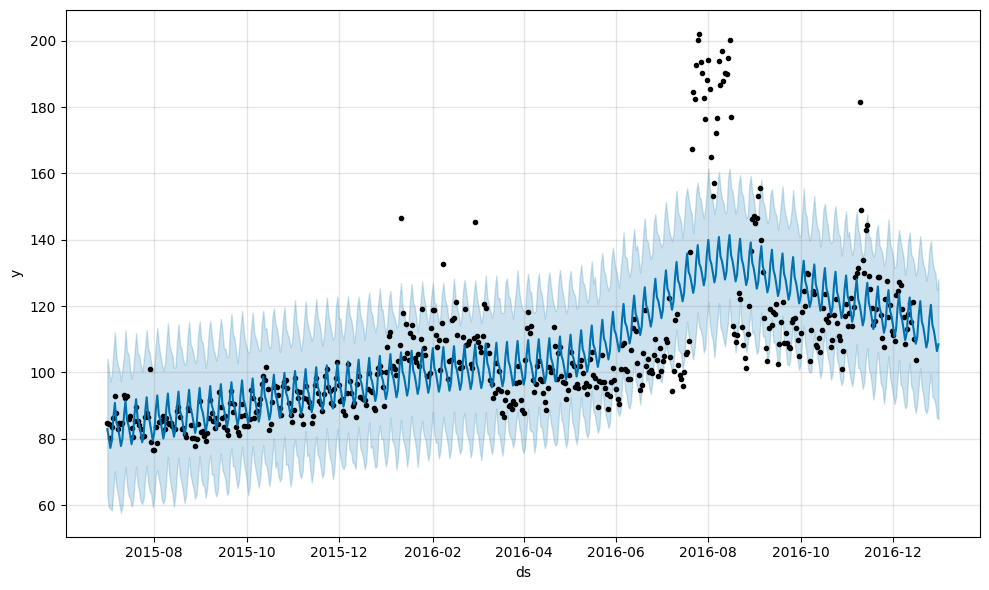

In [ ]:
m.plot(forecast);

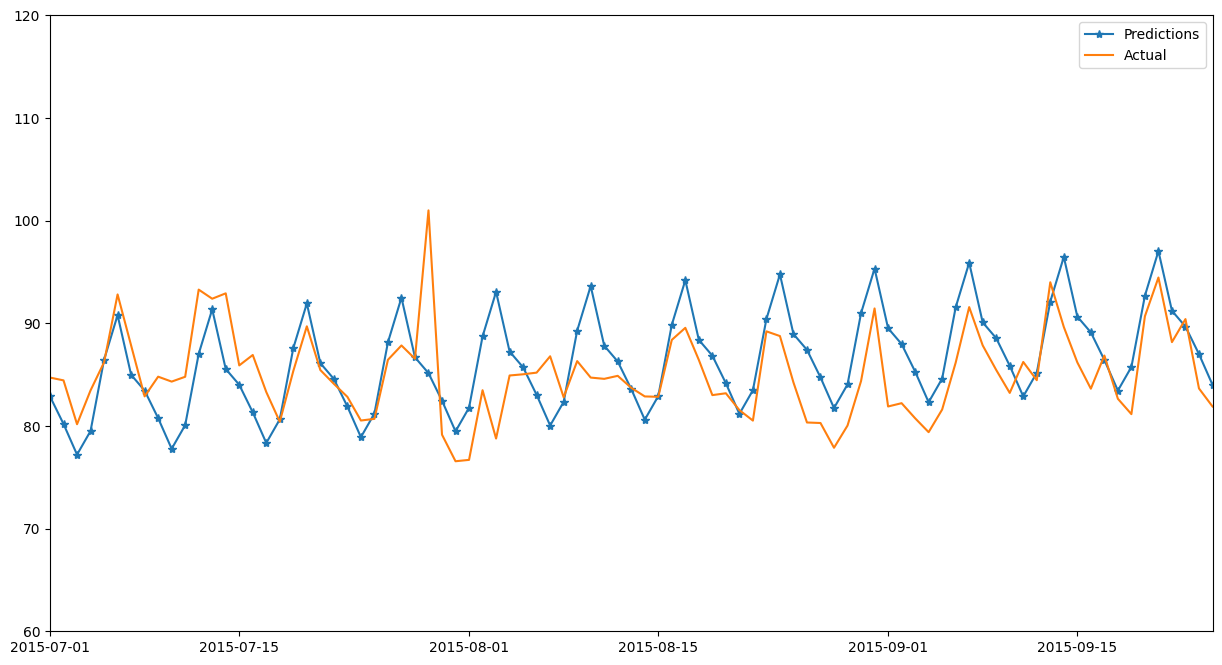

In [ ]:
plt.plot(forecast['ds'], forecast['yhat'],'-*', label = 'Predictions')
plt.plot(df_fb['ds'], df_fb['y'], label = 'Actual')
plt.xlim(pd.to_datetime('2015-07-01'), pd.to_datetime('2015-09-25'))
plt.ylim(60, 120)
plt.legend()
plt.show()

In [ ]:
performance(df_fb['y'][:-15], forecast['yhat'][:-15])

MAE : 10.238
RMSE : 15.82
MAPE: 0.086


#**Forecasting for different languages**

In [ ]:
df.head()

language,de,en,es,fr,ja,ru,zh
date,,,,,,,
2015-07-01,13.260519,84.712190,15.278553,8.458638,11.863200,9.463854,4.144988
2015-07-02,13.079896,84.438545,14.601013,8.512952,13.620792,9.627643,4.151189
2015-07-03,12.554042,80.167728,13.427632,8.186030,12.305383,8.923463,4.123659
2015-07-04,11.520379,83.463204,12.606538,8.749842,15.456239,8.393214,4.163448
2015-07-05,13.392347,86.198637,13.710356,8.590493,14.827204,8.938528,4.441286


**Pipeline for working with multiple series**





Page view predictions for de 


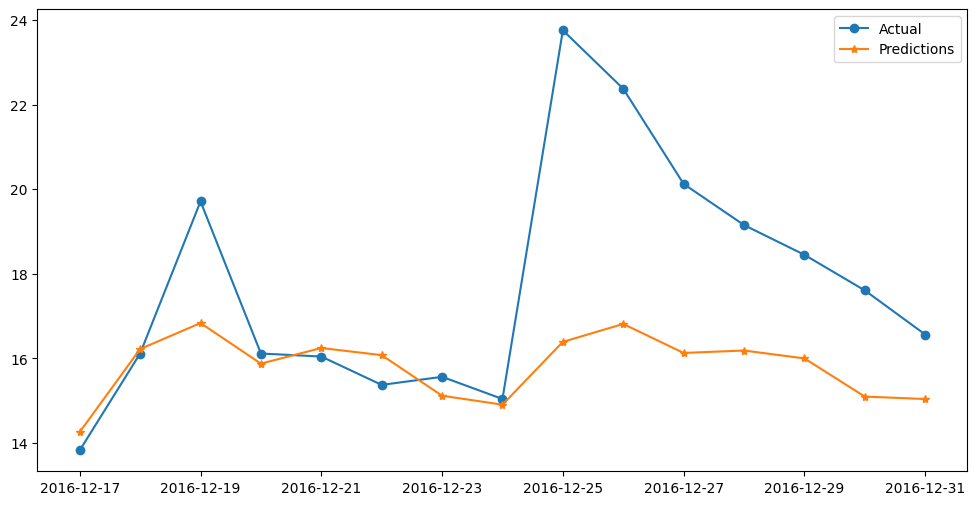

MAE : 2.102
RMSE : 2.989
MAPE: 0.105




Page view predictions for es 


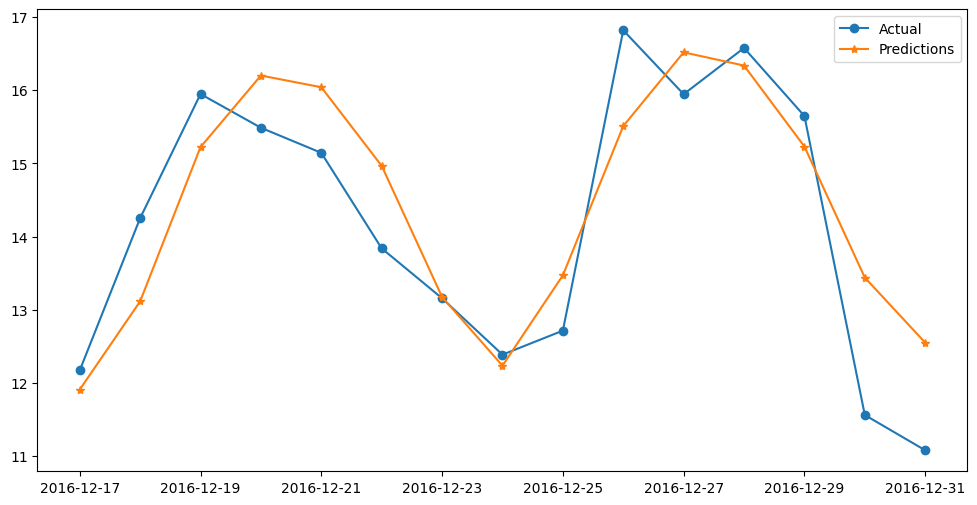

MAE : 0.779
RMSE : 0.932
MAPE: 0.057




Page view predictions for fr 


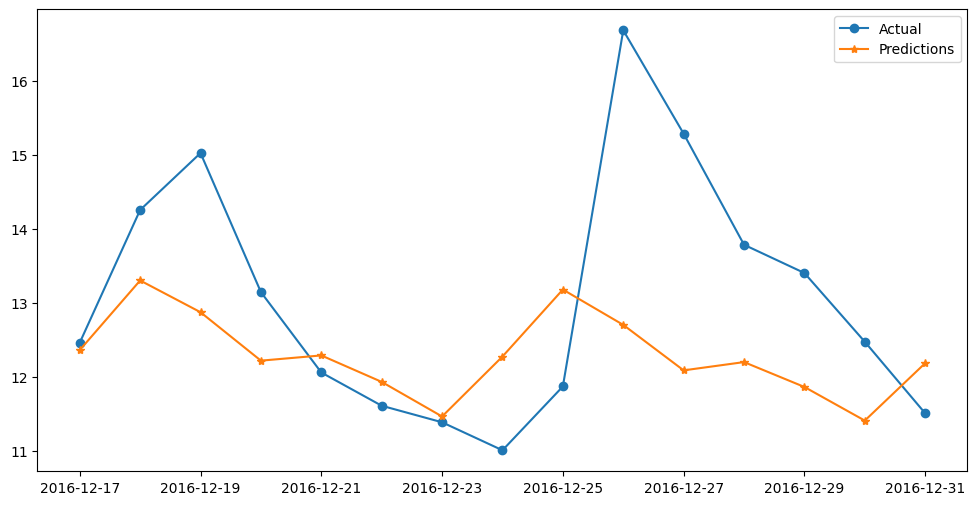

MAE : 1.292
RMSE : 1.681
MAPE: 0.093




Page view predictions for ja 


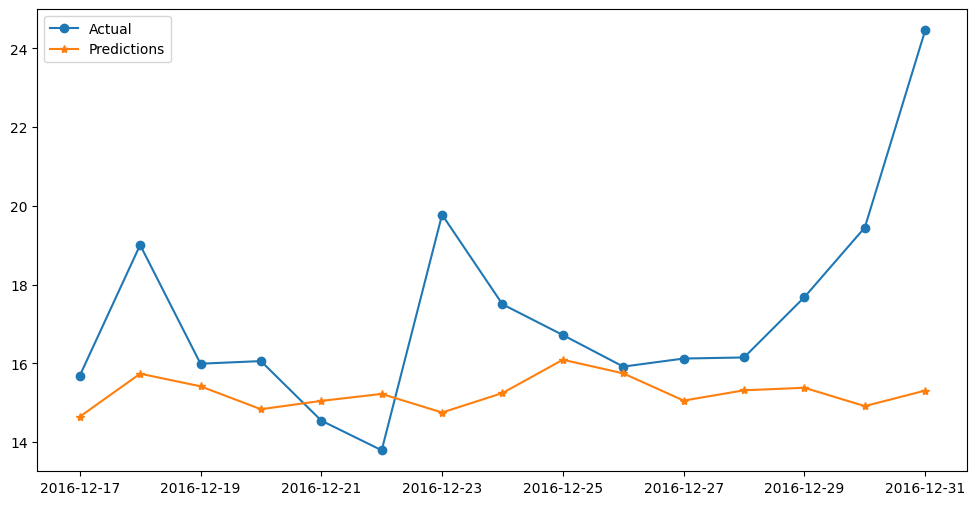

MAE : 2.267
RMSE : 3.247
MAPE: 0.118




Page view predictions for ru 


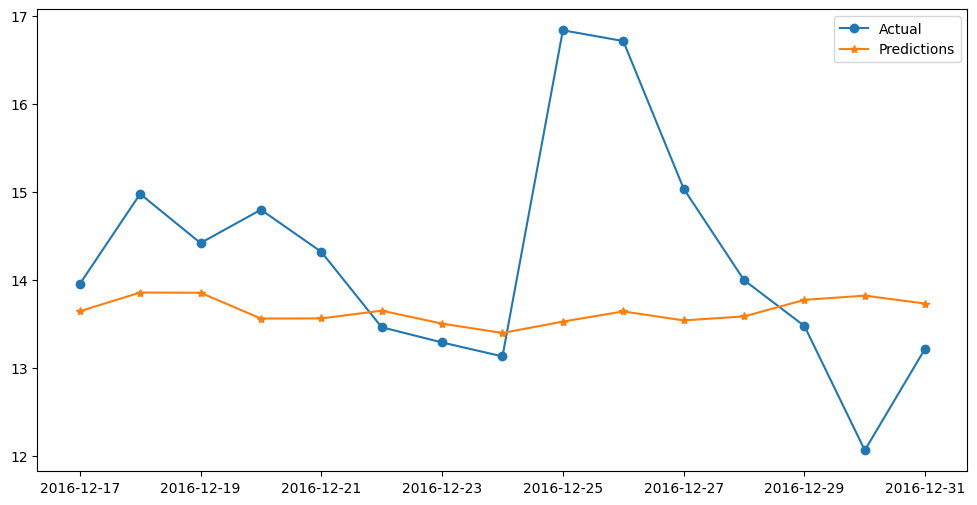

MAE : 1.034
RMSE : 1.418
MAPE: 0.069




Page view predictions for zh 


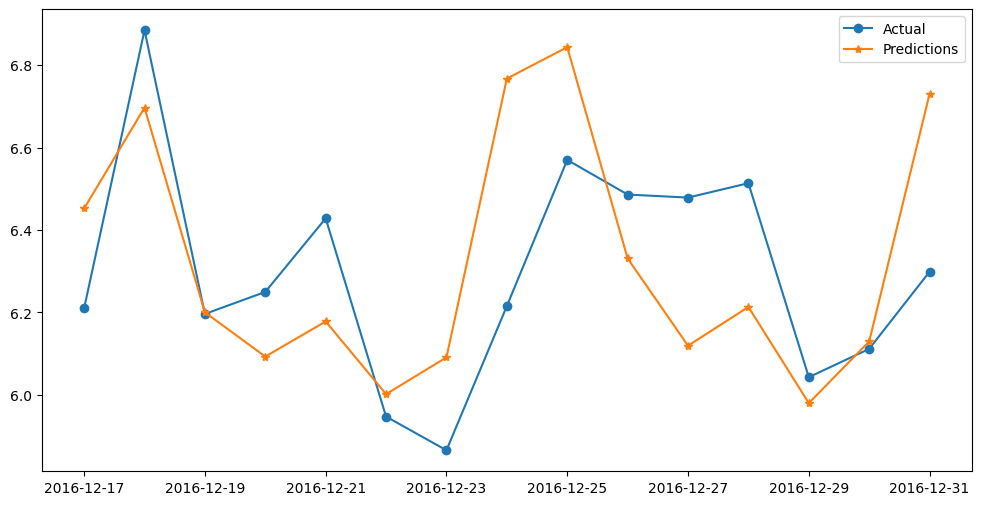

MAE : 0.218
RMSE : 0.264
MAPE: 0.034


In [ ]:
plt.rcParams["figure.figsize"] = [12, 6]
for col in df.columns:
  if col != 'en':
    # Creating language specific DataFrame
    df_lang = pd.DataFrame(df[col])

    # Split into train and test
    train_x = df_lang.loc[df_lang.index < df_lang.index[-15]].copy()
    test_x = df_lang.loc[df_lang.index >= df_lang.index[-15]].copy()

    # fit the model
    model = SARIMAX(train_x, order=(8, 1, 6)) 
    model = model.fit(disp=False)

    # Forecast prediction
    test_x['pred'] = model.forecast(steps=50)

    #Plot the graph
    print()
    print()
    print()
    print()
    print('\033[1mPage view predictions for', col, '\033[0m')
    plt.plot(test_x[col], '-o', label = 'Actual')
    plt.plot(test_x['pred'], '-*', label = 'Predictions')
    plt.legend()
    plt.show()
    
    warnings.filterwarnings("ignore")
    #Performance of the model
    performance(test_x[col], test_x['pred'])

# 'chinese' language has the highest MAPE of 3.4% followed by 'spanish' language with MAPE of 5.7%

#**Questionnaire**

**What does the decomposition of series do?**

The decomposition of a series refers to the process of breaking down a time series data into its constituent components, typically **trend, seasonality, and residuals**.

Decomposing a time series can help identify patterns, trends, and seasonality in the data, which can be useful for understanding underlying patterns and making accurate forecasts or predictions.

**What level of differencing gave you a stationary series?**

First order differencing sufficed

**Write 3 inferences you made from the data visualizations**



1.   English langauge has the highest number of views followed by spanish, french and japenese
2.   Distribution of page views in none of the languages is normal. Page views distribution in russian language is highly skewed.
3.   There seems to be some sort of seasonality in the page views for spanish language which repeats every 5-7 months



**Difference between ARIMA, SARIMA & SARIMAX**

All these time series forecasting models differ in terms of their capabilities and the type of time series data they can handle.



1.   **ARIMA** is suitable for time series data that do not exhibit any explicit seasonality. ARIMA models can capture trends and short-term dependencies in time series data.

2.   **SARIMA**, an extension of ARIMA, includes additional seasonal components to handle time series data with explicit seasonality. SARIMA models can capture both non-seasonal and seasonal patterns in time series data.

3.   **SARIMAX**, an extension of SARIMA, that allows for the inclusion of exogenous variables, which are external factors that can influence the time series being forecasted. This helps in improving the accuracy of the forecasts.



**Compare the number of views in different languages**

English langauge has the highest number of views followed by spanish, french and japenese

**What other methods other than grid search would be suitable to get the model for all languages?**

Some alternative methods to grid search:

1. **Randomized Search**: In this method, random selection of hyperparameter values is used for training and evaluation.

2. **Bayesian Optimization**: Bayesian optimization is a probabilistic model-based optimization technique that sequentially selects hyperparameter values based on their estimated performance and updates the model iteratively. It uses the concept of probabilistic models to model the unknown function and sequentially selects new hyperparameter values to evaluate based on the estimated performance.

3. **Genetic Algorithms**: Genetic algorithms are search algorithms inspired by the process of natural selection, which evolve a population of candidate solutions over multiple generations to find the best solution.

4. **Model-based Selection**: Instead of explicitly searching through different hyperparameter values, some methods select the best model based on their performance during training. For example, cross-validation.